
# Оцінка та вдосконалення моделі


<h2>Мета</h2>

Ознайомитись з методами оцінки та вдосконалення регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Розділяти дані на навчальну та тестову вибірки
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі прогнозування за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).
2. Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?
3. Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?
4. Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.
5. Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).</p>
</div>


Імпортую бібліотеки

In [36]:
import pandas as pd
import numpy as np
import sklearn
import ipywidgets

Зчитую дані з файлу у датафрейм


In [37]:
from google.colab import drive
drive.mount('/content/drive')
filename = "/content/drive/My Drive/clean_data4.csv"
df = pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660


Буду використовувати тільки числові дані


In [38]:
df=df._get_numeric_data()
df.head()

,GDP per capita,Population,CO2 emission,Area,Population density
0,561.778746,34656032.0,9809.225000,652860,53.083405
1,4124.982390,2876101.0,5716.853000,28750,100.038296
2,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,11834.745230,55599.0,165114.116337,200,277.995000
4,36988.622030,77281.0,462.042000,470,164.427660


Записую дані у два датафрейми: предиктори (x_data) та відгуки (y_data).


In [39]:
y_data = df['CO2 emission']
x_data=df.drop('CO2 emission',axis=1)

Випадковим чином розділяю дані на навчальні та тестові (20% загального набору в якості тестових даних).


In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 44
number of training samples: 173


<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?</p>
</div>


<p>З попередніх робіт знаю, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>Population</li>
    <li>Area</li>
</ul>
При цьому одномірна модель для Population була кращою. Тому будуватиму моделі, використовуючи саме цю ознаку як предиктор.

<p>Створюю об’єкт лінійної регресії та навчаю модель</p>


In [41]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

lre.fit(x_train[['Population']], y_train)

LinearRegression()

Обчислюю R^2  на навчальних та тестових даних:


In [42]:
print(f"R^2 training data = {lre.score(x_train[['Population']], y_train)}")
print(f"R^2 test data = {lre.score(x_test[['Population']], y_test)}")

R^2 training data = 0.6476003431375894
R^2 test data = 0.5154367821954019


<p>Вони різні бо ми використовуємо різні набори даних: навчальний та тестовий.</p>
<p>При виборі моделі треба орієнтуватись на більший R^2. У нашому випадку це навчальні дані.</p>


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?</p>
</div>


Будую поліноміальну модель 1-15 ступенів, на тестових даних обчислюю R^2


In [43]:
from sklearn.preprocessing import PolynomialFeatures
Rsqu_test = []
degree_array = [i for i in range(1, 16)]
for n in degree_array:
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['Population']])
  x_test_pr = pr.fit_transform(x_test[['Population']])

  lre.fit(x_train_pr, y_train)

  test_score = lre.score(x_test_pr, y_test)
  Rsqu_test.append(test_score)

  print(f"R^2 test data (degree = {n}) = {test_score}")

R^2 test data (degree = 1) = 0.5154367821954019
R^2 test data (degree = 2) = 0.5211384290446694
R^2 test data (degree = 3) = 0.2305727851095173
R^2 test data (degree = 4) = -0.12332512457570788
R^2 test data (degree = 5) = -0.03155282630624523
R^2 test data (degree = 6) = -0.015741859698052307
R^2 test data (degree = 7) = -0.014277211784029742
R^2 test data (degree = 8) = -0.014177050492885979
R^2 test data (degree = 9) = -0.014176615951107197
R^2 test data (degree = 10) = -0.014178506249309164
R^2 test data (degree = 11) = -0.014179086639916738
R^2 test data (degree = 12) = -0.014179223560047971
R^2 test data (degree = 13) = -0.014179252947480014
R^2 test data (degree = 14) = -0.014179258938366468
R^2 test data (degree = 15) = -0.014179260109165037


Візуалізую моделі (зручно розміщувати всі моделі на одному графіку для обрання найкращої) та показник їх якості (доцільно побудувати графік залежності R^2 або MSE від порядку поліному моделі)

Text(3, 0.75, 'Maximum R^2 ')

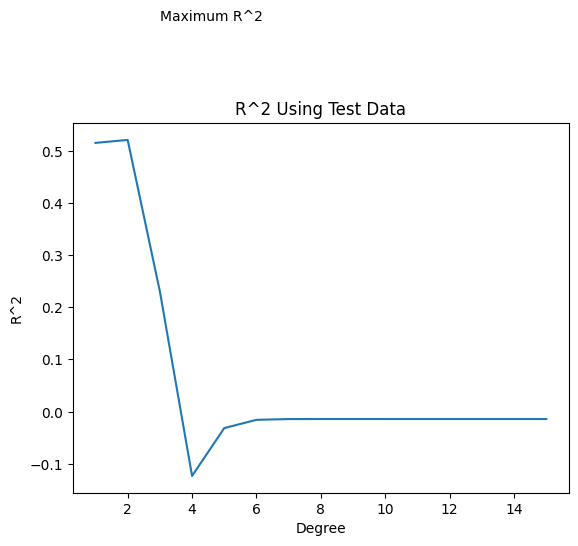

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(degree_array, Rsqu_test)
plt.xlabel("Degree")
plt.ylabel("R^2")
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

Найкращою є модель 4 ступеня, бо для 5 ступеня вже спостерігається перенавчання.


Також є питання стосовно правильності ориманих результатів (це я для себе залишаю коментар, щоб не забути спитати при здачі).

<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.</p>
</div>


Будую модель гребеневої регресії, обчислюю R^2


In [45]:
# Виконую поліноміальне перетворення 2 ступеня для двох обраних ознак
pr1=PolynomialFeatures(degree=2)

x_train_pr1=pr1.fit_transform(x_train[['Population', 'Area']])
x_test_pr1=pr1.fit_transform(x_test[['Population', 'Area']])

In [46]:
from sklearn.linear_model import Ridge
# Створюю об’єкт гребеневої регресії, встановивши параметр alpha=10
ridge_score = Ridge(alpha=0.001).fit(x_train_pr1, y_train)
ridge_score.score(x_test_pr1, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.50471e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


-1.8141470300335065

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.</p>
</div>


Створюю словник значень параметрів:


In [47]:
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

Створюю об’єкт сітки пошуку параметра гребеневої регресії:


In [48]:
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)

Підбираю модель:


In [49]:
Grid1.fit(x_data[['Population', 'Area']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

Отримую модель з найкращими параметрами:


In [50]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000000)

Тестую модель на тестових даних (обчислюю R^2):


In [51]:
BestRR.score(x_test[['Population', 'Area']], y_test)

0.3506943821125924

<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте візуалізації для оцінки якості моделей (лінійної, кращої з поліноміальних та кращої з гребеневих), всі розмістіть на одній координатній сітці для зручного порівняння.</p>
</div>


Використаю метод "predict", щоб спрогнозувати результати, а потім скористаюсь функцією "DistributionPlot", щоб відобразити розподіл прогнозованих результатів для тестових даних порівняно з фактичними для тестових даних.


<ipython-input-52-9e8e3bbf0d11>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(actual, hist=False, color="r", label="Actual Value")
<ipython-input-52-9e8e3bbf0d11>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fitted, hist=False, color="b", label="Fitted Values", ax

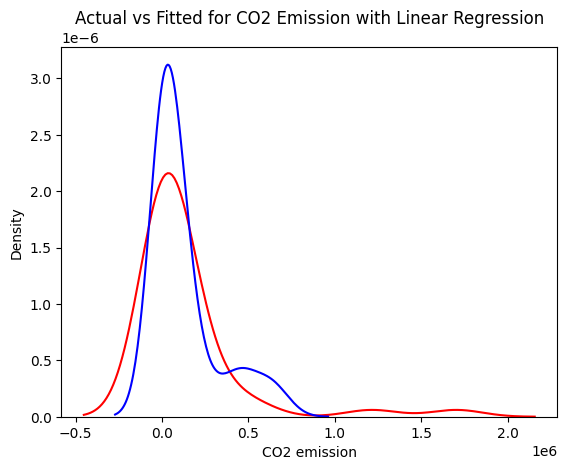

<ipython-input-52-9e8e3bbf0d11>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(actual, hist=False, color="r", label="Actual Value")
<ipython-input-52-9e8e3bbf0d11>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fitted, hist=False, color="b", label="Fitted Values", ax

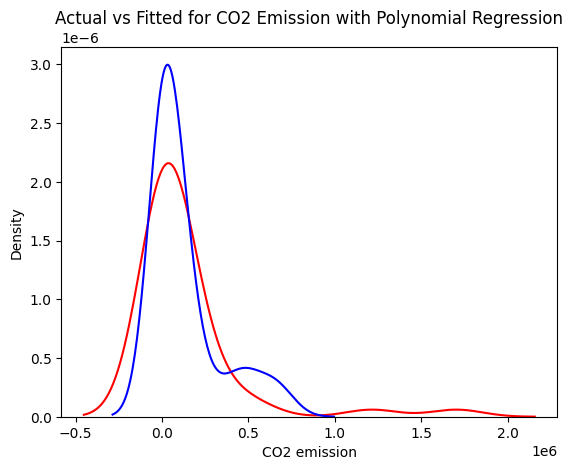

<ipython-input-52-9e8e3bbf0d11>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(actual, hist=False, color="r", label="Actual Value")
<ipython-input-52-9e8e3bbf0d11>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fitted, hist=False, color="b", label="Fitted Values", ax

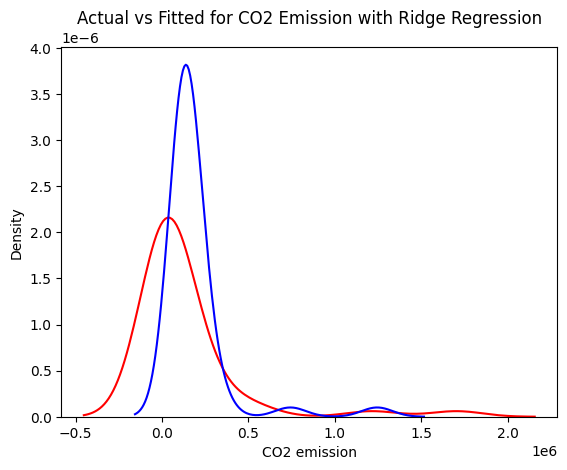

In [52]:
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def fit_and_predict(model, x_train, y_train, x_test):
  model.fit(x_train, y_train)
  return model.predict(x_test)

yhat_test_lin = fit_and_predict(LinearRegression(), x_train[['Population']], y_train, x_test[['Population']])
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['Population']])
x_test_pr = pr.transform(x_test[['Population']])
yhat_test_poly = fit_and_predict(LinearRegression(), x_train_pr, y_train, x_test_pr)

pipeline = Pipeline([ ('scaler', StandardScaler()), ('ridge', Ridge(alpha=1000))])
yhat_test_ridge_pipe = fit_and_predict(pipeline, x_train[['Population', 'Area']], y_train, x_test[['Population', 'Area']])

def plot_actual_vs_fitted(actual, fitted, title):
  ax = sns.distplot(actual, hist=False, color="r", label="Actual Value")
  sns.distplot(fitted, hist=False, color="b", label="Fitted Values", ax=ax)
  plt.title(title)
  plt.show()

# для лінійної моделі

plot_actual_vs_fitted(y_test, yhat_test_lin, 'Actual vs Fitted for CO2 Emission with Linear Regression')

# для поліноміальної моделі
plot_actual_vs_fitted(y_test, yhat_test_poly, 'Actual vs Fitted for CO2 Emission with Polynomial Regression')

# для гребеневої моделі
plot_actual_vs_fitted(y_test, yhat_test_ridge_pipe, 'Actual vs Fitted for CO2 Emission with Ridge Regression')

<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>моделі лінійної та поліноміальної регресій є найкращими моделями</b> для прогнозування 'CO2 emission' на основі нашого набору даних. </p>

<h2>Виконав студент групи ІП-23 <br> Востріков Любомир</h2>
